<a href="https://colab.research.google.com/github/Nadda1004/Intro_Machine_learning/blob/main/W1_D5_case_study_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weekend Project
  ### **Group members:**



  *   Abeer Alghamdi
  *   Nada Alzahrani
  *   Afrah Alharbi
  *   Shaima Alamri 




In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Set3')

In [2]:
# Read dataset:

raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'

df = pd.read_csv(raw_link)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No


### 1 - Dataset Simple Info

In [3]:
# Shape
df.shape

(6338, 21)

In [4]:
# Columns names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Columns Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [6]:
# Since total Charges column is string we will convert it to int 
df.TotalCharges = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
# Columns Info ( So we can make sure the total charges column data type was changed)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [8]:
# Catgorical column describtion 
df.describe(exclude=[np.number])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338
unique,6338,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,4636-TVXVG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3197,3267,4435,5717,3047,2796,3155,2804,2785,3126,2529,2517,3503,3769,2150,4650


### 2 - Looking for Null Values 

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [10]:
# print rows with null values --> all in total charges column
df.loc[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3046,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3182,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
3525,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
4002,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
4378,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
4773,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
5570,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
5630,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No


In [11]:
# Dealing with missing values:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['MonthlyCharges' , 'TotalCharges']] = imp.fit_transform(df[['MonthlyCharges' , 'TotalCharges']])


In [12]:
# to make sure that all null calues has values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 3 - Exploratory Data Analysis With Visualization

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.10,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.40,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No


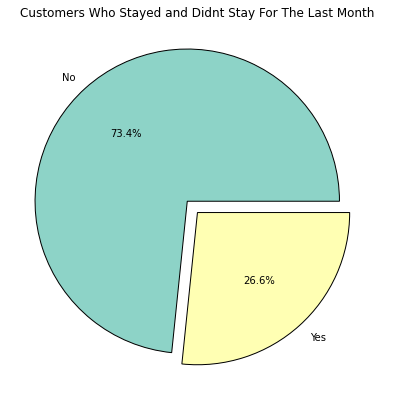

In [14]:
# Creating pie chart for Churn categorical variable
plt.figure(figsize=(7,7))
plt.pie(df.Churn.value_counts(), explode=[0.1,0],labels=['No', 'Yes'] , autopct='%1.1f%%' ,
        wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.title("Customers Who Stayed and Didnt Stay For The Last Month");

In [15]:
# show churn of customer based on gender
pd.crosstab(df['gender'],df['Churn'])

Churn,No,Yes
gender,,
Female,2291,850
Male,2359,838


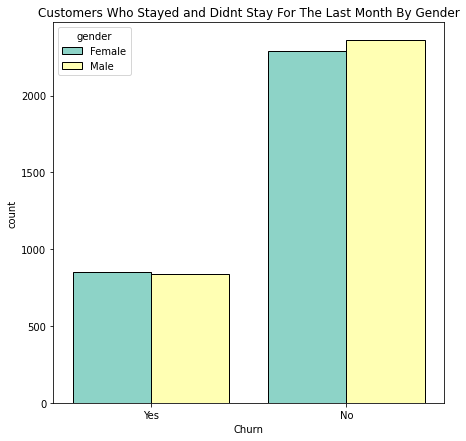

In [16]:
# Creating bar chart for Churn based on gender:
plt.figure(figsize=(7,7))
sns.countplot(x=df.Churn, hue=df.gender,saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=1).set(title = 'Customers Who Stayed and Didnt Stay For The Last Month By Gender');

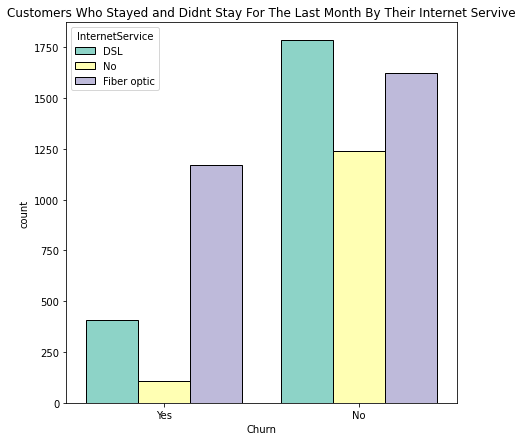

In [17]:
# Creating bar chart for Churn based on InternetService:
plt.figure(figsize=(7,7))
sns.countplot(x="Churn", data = df, hue="InternetService",saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=1).set(title = 'Customers Who Stayed and Didnt Stay For The Last Month By Their Internet Servive');

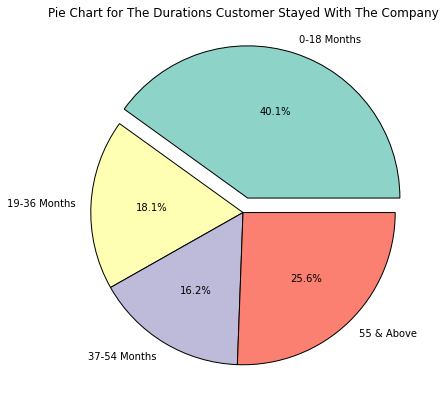

In [18]:
# Creating pie chart display tenure duration of customers: 
period_1 = df.loc[df.tenure <= 18].tenure.count()
period_2 = df.loc[((df.tenure > 19)&(df.tenure <= 36))].tenure.count()
period_3 = df.loc[((df.tenure > 37)&(df.tenure <= 54))].tenure.count()
period_4 = df.loc[((df.tenure > 55)&(df.tenure <= 72))].tenure.count()
period_list = [period_1 , period_2  , period_3 , period_4]

plt.figure(figsize=[7,7])
plt.pie(period_list, explode=[0.1,0,0,0], labels=['0-18 Months', '19-36 Months', '37-54 Months', '55 & Above' ] ,
        autopct='%1.1f%%',
              wedgeprops = {"edgecolor" : "black", 
                      'linewidth': 1, 
                      'antialiased': True})
plt.title("Pie Chart for The Durations Customer Stayed With The Company");

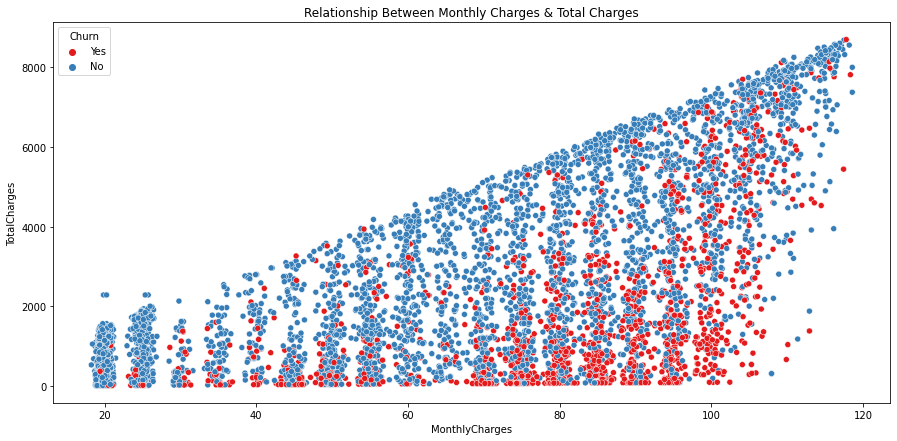

In [19]:
# Creating scatter chart display relationship between monthly charges & total charges: 
plt.figure(figsize=(15,7))
sns.scatterplot(x = df.MonthlyCharges , y = df.TotalCharges , hue = df.Churn, palette="Set1").set(title = 'Relationship Between Monthly Charges & Total Charges');

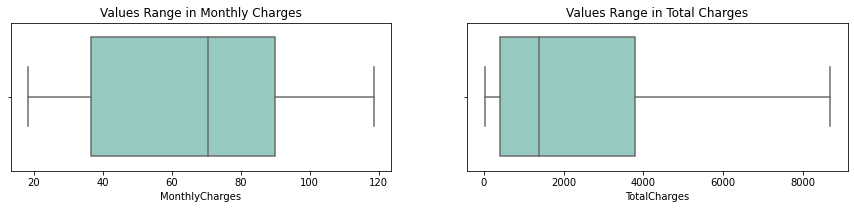

In [20]:
# Creating boxplot
plt.figure(figsize=(15,6))
plt.subplot(2,2,1);
sns.boxplot(x = df.MonthlyCharges).set(title= 'Values Range in Monthly Charges');
plt.subplot(2,2,2);
sns.boxplot(x = df.TotalCharges).set(title= 'Values Range in Total Charges');

In [21]:
# clculate the correlation between MonthlyCharges and TotalCharges
df.MonthlyCharges.corr(df.TotalCharges)

0.6496379563229383

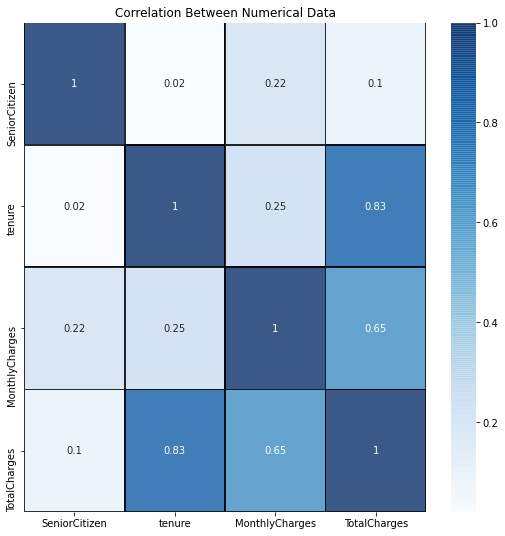

In [22]:
# Correlation between numeric data
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='Blues', alpha= 0.8,linewidths=0.8, linecolor='black').set(title = 'Correlation Between Numerical Data');

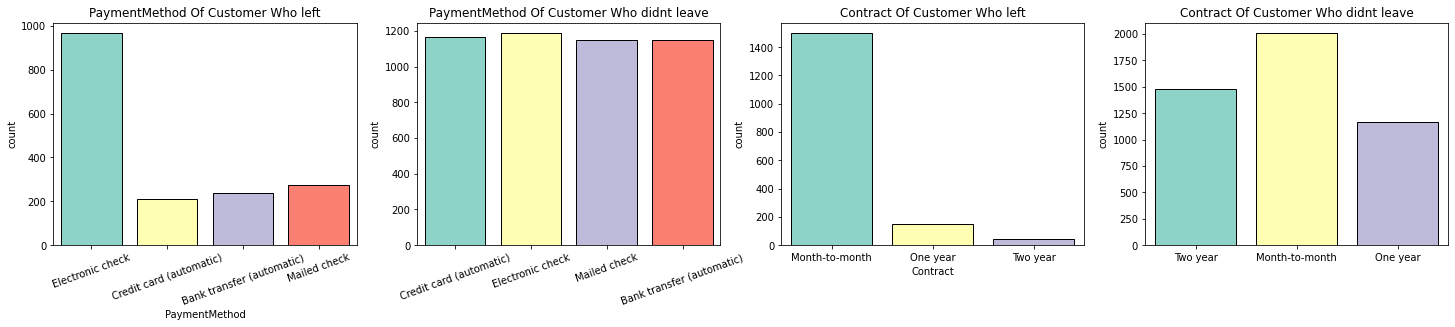

In [23]:
# get the customer who left last month
# plot all other columns as count plot 
list1 = ['PaymentMethod' , 'PaymentMethod' , 'Contract' ,'Contract']
df_churn_yes = df.loc[df.Churn == 'Yes']
df_churn_no = df.loc[df.Churn == 'No']
plt.figure(figsize=[25,9]);
for i in range(len(list1)):
  plt.subplot(2,4,i+1);
  if i % 2 == 0:
    title1 = list1[i]+" Of Customer Who left"
    sns.countplot(x = df_churn_yes[list1[i]],saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=1).set(title = title1)

  else:
    title1 = list1[i]+" Of Customer Who didnt leave"
    sns.countplot(x = df_churn_no[list1[i]],saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=1).set(title = title1)
    plt.xlabel(' ')

  if list1[i] == 'PaymentMethod':
    plt.xticks(rotation=20)

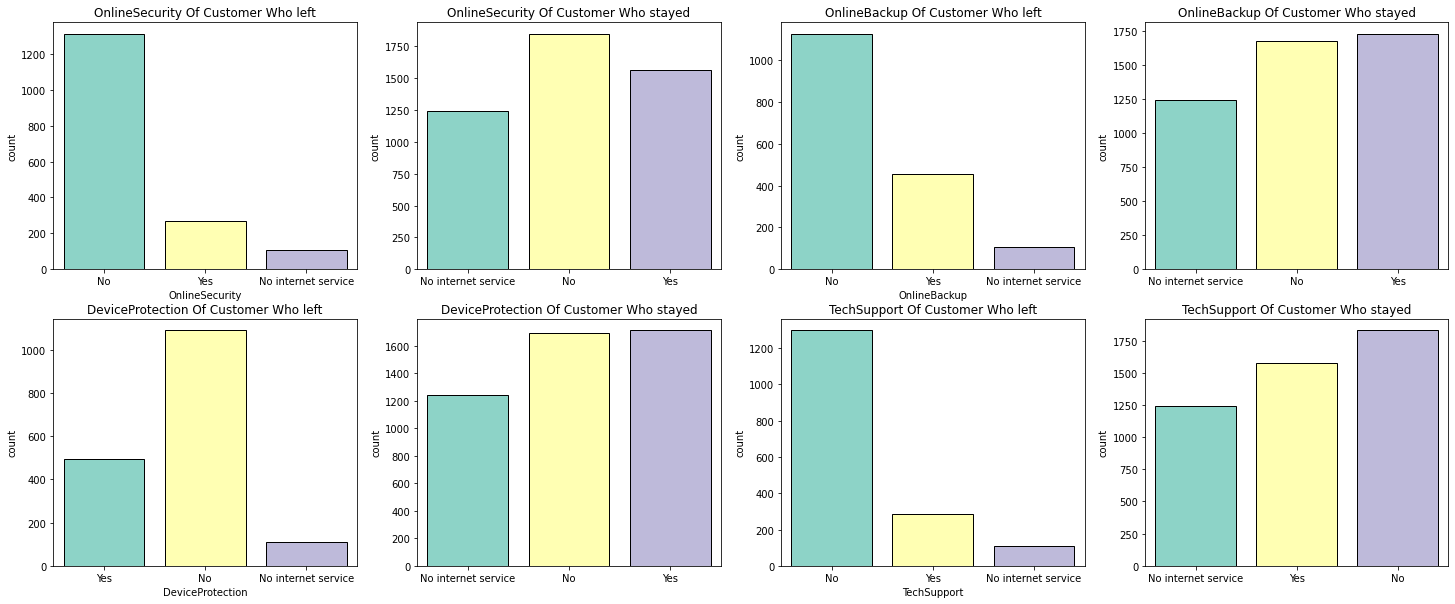

In [24]:
# Function to plot columns using plot bar for customer who left and didnt leave 
def col_bar(col_name1 , col_name2 , col_name3 ,col_name4):
  list1 = [col_name1 ,col_name1 , col_name2 ,col_name2 , 
           col_name3 ,col_name3 , col_name4 ,col_name4]
  df_churn_yes = df.loc[df.Churn == 'Yes']
  df_churn_no = df.loc[df.Churn == 'No']
  plt.figure(figsize=[25,10]);
  for i in range(len(list1)):
    plt.subplot(2,4,i+1);
    if i % 2 == 0:
      title1 = list1[i]+" Of Customer Who left"
      sns.countplot(x = df_churn_yes[list1[i]],saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=1).set(title = title1)

    else:
      title1 = list1[i]+" Of Customer Who stayed"
      sns.countplot(x = df_churn_no[list1[i]],saturation=1,
                  edgecolor=(0,0,0),
                  linewidth=1).set(title = title1)
      plt.xlabel(' ')

    if list1[i] == 'PaymentMethod':
      plt.xticks(rotation=20)

col_bar('OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport')

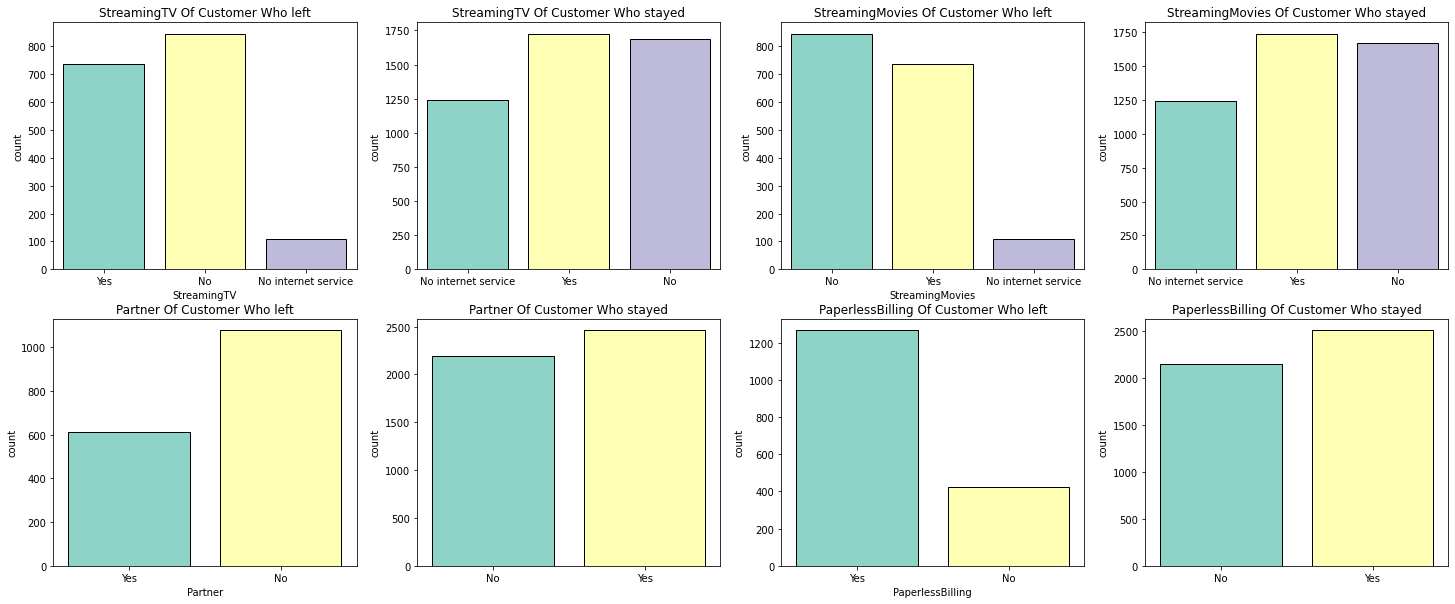

In [25]:
col_bar('StreamingTV', 'StreamingMovies', 'Partner', 'PaperlessBilling')

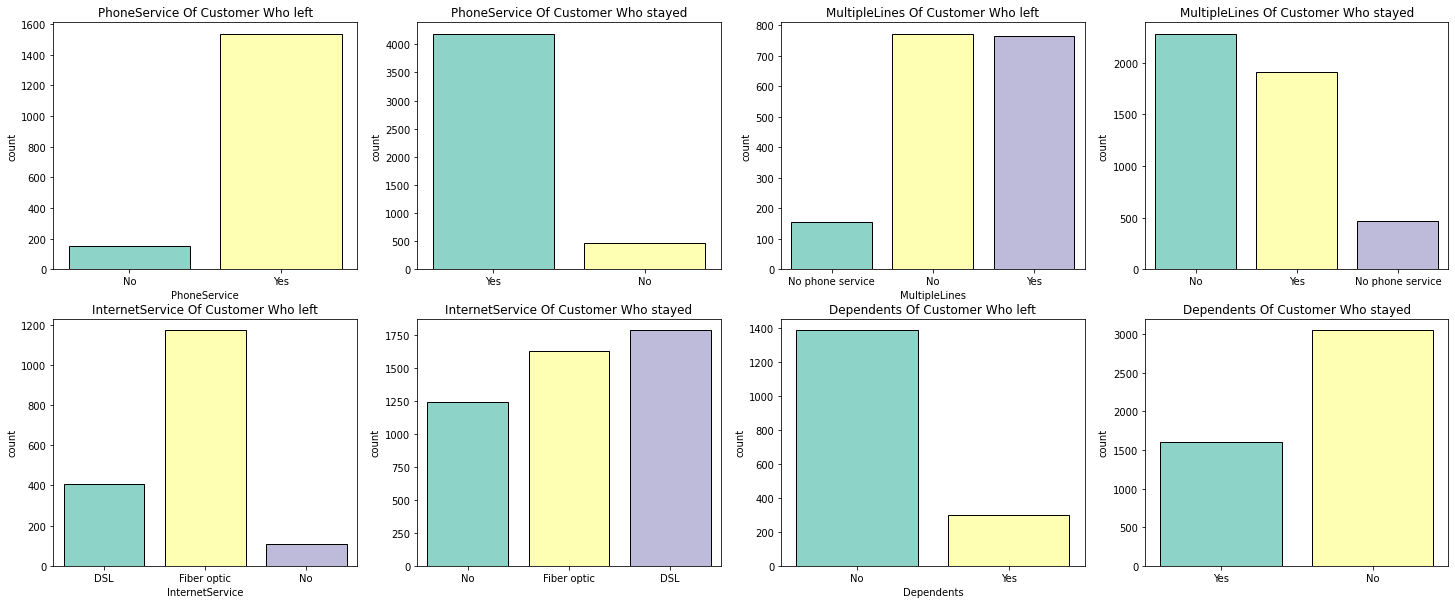

In [26]:
col_bar('PhoneService', 'MultipleLines', 'InternetService', 'Dependents')

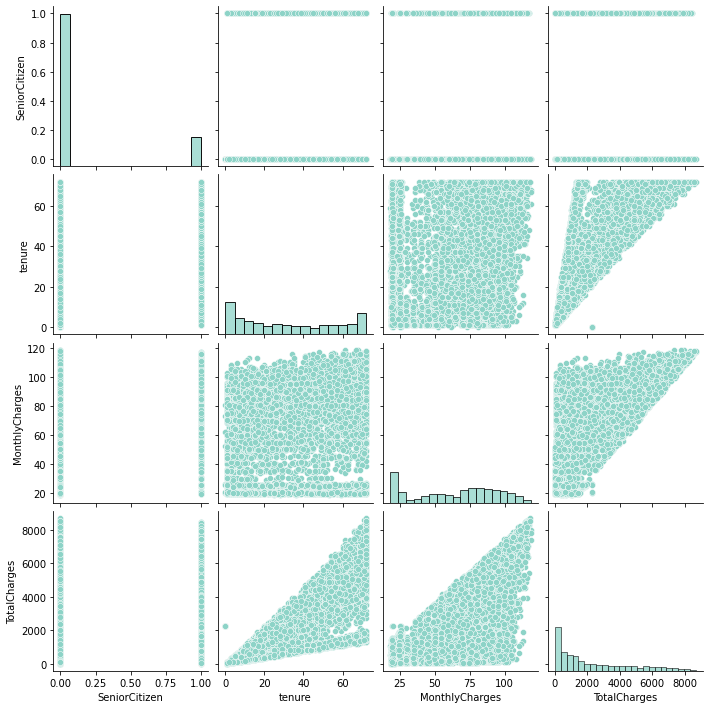

In [27]:
# create pairplot
sns.pairplot(data = df);

###4- Processing Data

In [28]:
# delete unnecessary culomns
df.drop(['customerID','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling'], 'columns', inplace= True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,18,No,DSL,Month-to-month,Electronic check,39.05,669.85,Yes
1,Male,0,No,Yes,66,Yes,No,Two year,Credit card (automatic),19.95,1269.10,No
2,Female,0,Yes,Yes,39,Yes,Fiber optic,Month-to-month,Credit card (automatic),99.95,3767.40,No
3,Male,0,No,No,10,Yes,Fiber optic,Month-to-month,Electronic check,95.25,1021.55,No
4,Female,0,No,No,27,Yes,DSL,Month-to-month,Mailed check,56.70,1652.95,No


In [29]:
df.shape

(6338, 12)

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6338.000000,6338.000000,6338.000000,6338.000000
mean,0.161723,32.283843,64.983236,2287.307804
std,0.368226,24.529521,29.992970,2268.054355
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,36.450000,402.525000
50%,0.000000,29.000000,70.500000,1394.800000
75%,0.000000,55.000000,90.000000,3799.837500
max,1.000000,72.000000,118.600000,8684.800000


In [31]:
# find null values
df[df.isnull().any(axis=1)].count()

gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [32]:
# display corrlation of numrical columns
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.020302,0.216512,0.102000
tenure,0.020302,1.000000,0.253420,0.829631
MonthlyCharges,0.216512,0.253420,1.000000,0.649638
TotalCharges,0.102000,0.829631,0.649638,1.000000


In [33]:
# convert booling values to 0 and 1
from sklearn import preprocessing

def feature_eng(col_name):
  label_encoding = preprocessing.LabelEncoder()
  df[col_name] = label_encoding.fit_transform(df[col_name].astype(str))
  pass

feature_eng('Churn')
feature_eng('Partner')
feature_eng('Dependents')
feature_eng('PhoneService')

In [34]:
# convert string values to 0 and 1 - binary
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df['gender'] = label_encoding.fit_transform(df['gender'].astype(str))
# we extracted this from the function so we can print the converted values 

In [35]:
label_encoding.classes_

array(['Female', 'Male'], dtype=object)

In [36]:
# convert string values to 0 and 1 - multi
def feature_eng2(col_name):
  
  return  pd.get_dummies(df, columns=[col_name])


df = feature_eng2("InternetService")
df = feature_eng2("Contract")
df = feature_eng2("PaymentMethod")


In [37]:
# shuffling data
df= df.sample(frac=1).reset_index(drop = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,13,1,88.95,1161.75,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,1,1,45.30,45.30,1,1,0,0,1,0,0,0,0,1,0
2,1,0,0,1,72,0,67.20,4671.70,0,1,0,0,0,0,1,0,1,0,0
3,0,1,0,0,13,1,54.80,731.30,0,1,0,0,1,0,0,0,0,1,0
4,0,0,0,0,69,1,110.50,7455.45,0,0,1,0,0,0,1,1,0,0,0


In [38]:
# find null values
df[df.isnull().any(axis=1)].count()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
dtype: int64

In [39]:
df.shape

(6338, 19)

# Setting up a simple Logistic Regression



[Sklearn docs - LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

Define a very simple `X` and `y`...

- `X` is / are your varible(s) that will help predict `y`
- `y` is your "target" (what you're trying to predict)

In [41]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

Fit the model...

Note: I skipped a step in setting up the data...

##### Split The Data into Train and Test

In [44]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.metrics import *

##### Testing Diffrent Random state values and split percentages and take the percentage who produced higher accuracy

1.   Split 70% train 
2.   Random State 0 - 50



In [ ]:
scores = []
for i in range(50):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=i)
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))
  
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=scores.index(max(scores)))
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [52]:
print('Score: ',max(scores) , '  ' , scores.index(max(scores)))
print('Accuracy: ' , accuracy_score(y_test, y_pred))
print('Recall: ' , recall_score(y_test, y_pred))
print('Percesion: ' , precision_score(y_test, y_pred))

Score:  0.8207150368033649    43
Accuracy:  0.8207150368033649
Recall:  0.5675675675675675
Percesion:  0.6724137931034483


1.   Split 80% train 
2.   Random State 0 - 50

In [ ]:
scores = []
for i in range(50):
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=i)
  lr.fit(X_train, y_train)
  scores.append(lr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , random_state=scores.index(max(scores)))
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [53]:
print('Score: ',max(scores) , '  ' , scores.index(max(scores)))
print('Accuracy: ' , accuracy_score(y_test, y_pred))
print('Recall: ' , recall_score(y_test, y_pred))
print('Percesion: ' , precision_score(y_test, y_pred))

Score:  0.8207150368033649    43
Accuracy:  0.8207150368033649
Recall:  0.5675675675675675
Percesion:  0.6724137931034483


#### Turns out 70% split with 43 random state produced higher accuracy

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=43)

In [ ]:
lr.fit(X_train, y_train)

Make predictions...

##### Model Result

In [56]:
y_pred = lr.predict(X_test)

In [57]:
# compare actual values with predicted values
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})
pred_results.head()

,y_test,y_pred
5490,0,0
1074,0,0
2148,0,0
1366,1,0
1387,0,0


In [58]:
# show contingency matrix
df_crosstab = pd.crosstab(pred_results.y_pred,pred_results.y_test)
df_crosstab

y_test,0,1
y_pred,,
0,1288,208
1,133,273


From here you'd...

1. Figure our your precision, recall, score, etc..
2. Make it into a pipeline... ([Docs Help](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) | [Basic Skeleton Code Help](https://github.com/gumdropsteve/intro_to_machine_learning/blob/main/day_03/02_assignment.ipynb))
3. Figure out your best hyperparams (GridSearchCV)...
4. Make that model...
5. ...

###### 1 - Accuracy, Percision, Recall

In [59]:
acc = accuracy_score(y_test , y_pred)
prec = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)

print("accuracy_score :", acc)
print("precision_score :", prec)
print("recall_score :", recall)

accuracy_score : 0.8207150368033649
precision_score : 0.6724137931034483
recall_score : 0.5675675675675675


###### 2 - Precision - Recall Graph

In [60]:
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)
print('Average precision score: {0:0.2f}'.format(average_precision))

Average precision score: 0.63


<Figure size 576x576 with 0 Axes>

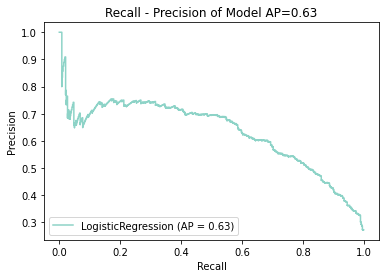

In [61]:
plt.figure(figsize=(8,8));
disp = plot_precision_recall_curve(lr, X_test, y_test);
disp.ax_.set_title('Recall - Precision of Model AP={0:0.2f}'.format(average_precision));

#### Pipeline 

In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def LR(**kwargs):
    return make_pipeline(LogisticRegression(**kwargs))

#### Grid Search

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'logisticregression__fit_intercept':[True, False],
             'logisticregression__penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'logisticregression__solver':["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
             'logisticregression__multi_class':["auto", "ovr", "multinomial"]}      


grid = GridSearchCV(LR(), param_grid, cv=7)
grid

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                  

In [ ]:
# fit the grid
grid.fit(X, y)

In [65]:
# show me the best params
grid.best_params_

{'logisticregression__fit_intercept': False,
 'logisticregression__multi_class': 'auto',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [66]:
# Best Score with the grid 
grid.best_score_

0.8004124045432449

## Ideas for customer retention programs



*   Provide your customers Who ended the contract benefits and promotions to get them to renew their contract.
*   Provide promotions for your current customers.
*   Upgrade Payment Methods That customers are more familiar with and more relevant these days.
*   Reward your customers who share their good experience with the company with their relative and friends  
*   Provide Better Technical Support for your customers (it is one of the biggest reasons customer left based on the data given)
*   Provide Better Online Backup for your customers (it is one of the biggest reasons customer left based on the data given)
*   Promot potential customers who do not have telephone service a trial period and other benefits so they can sign up.
*   Provide your customers Who are on a long contract benefits and discount for their family and elders.


`



